In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

## Load data

In [2]:
# Let's import the 2019 and 2021 databases:

df1 = pd.read_csv("Situación académica al finalizar el año escolar 2019 según educación tradicional por grados, ciclos y jornada.csv",
                  delimiter=";")

df2 = pd.read_csv("Situación académica al finalizar el año escolar 2021 según educación tradicional por jornada.CSV",
                  delimiter=",")

## Transformation

In [3]:
# Let's adjust the names of the year in the dfs, because this information is about the academic situation in the scholar year 2019 and 2021:

df1['PERIODO_ANIO'] = 2019
df2['PERIODO_ANIO'] = 2021

## Concatenation

In [4]:
df = pd.concat([df1, df2], ignore_index=True)

## Transformation

In [5]:
# Now let's filter the data only by Básica primaria, Básica secundaria, Preescolar and Media

names = ['Preescolar', 'Básica primaria', 'Básica secundaria', 'Media']

df = df[df['NIVELENSE_NOMBRE'].isin(names)]

In [6]:
df

,SEDE_CODIGO,PERIODO_ID,PERIODO_ANIO,JORNADA_ID,JORNADA_CODIGO,JORNADA_NOMBRE,NIVELENSE_ID,NIVELENSE_CODIGO,NIVELENSE_NOMBRE,GRADO_ID,GRADO_CODIGO,GRADO_NOMBRE,SITUACADE_ID,SITUACADE_CODIGO,SITUACADE_NOMBRE,JORNSITU_CANTIDAD_HOMBRE,JORNSITU_CANTIDAD_MUJER
0,325430800015,7,2019,1,1,Completa,1,1,Preescolar,1,PR,Pre-jardín,1,1,Aprobados,16,7
1,325430800015,7,2019,1,1,Completa,1,1,Preescolar,1,PR,Pre-jardín,3,3,Desertores,0,0
2,325430800015,7,2019,1,1,Completa,1,1,Preescolar,1,PR,Pre-jardín,4,4,Transferidos/Transladados,0,0
3,325430800015,7,2019,1,1,Completa,1,1,Preescolar,2,JA,Jardín,1,1,Aprobados,13,10
4,185250001932,7,2019,2,2,Mañana,1,1,Preescolar,3,TR,Transición,1,1,Aprobados,62,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899896,376248000961,9,2021,2,2,Mañana,4,4,Media,13,10,10.°,4,4,Transferidos/Transladados,1,0
1899897,376248000961,9,2021,2,2,Mañana,4,4,Media,14,11,11.°,1,1,Aprobados,5,1
1899898,376248000961,9,2021,2,2,Mañana,4,4,Media,14,11,11.°,2,2,Reprobados,0,0
1899899,376248000961,9,2021,2,2,Mañana,4,4,Media,14,11,11.°,3,3,Desertores,0,0


## Desertion rate

In [7]:
# Let's create a pivot table to group the variables by Nivel, situación academica, año, y género

pivot = df.pivot_table(index=['NIVELENSE_NOMBRE', 'SITUACADE_NOMBRE'],
                       columns='PERIODO_ANIO',
                       values=['JORNSITU_CANTIDAD_HOMBRE', 'JORNSITU_CANTIDAD_MUJER'],
                       aggfunc='sum')

pivot

JORNSITU_CANTIDAD_HOMBRE           \
PERIODO_ANIO                                                    2019     2021   
NIVELENSE_NOMBRE  SITUACADE_NOMBRE                                              
Básica primaria   Aprobados                                  1704037  1667676   
                  Desertores                                   47254    57370   
                  Reprobados                                  118876   113297   
                  Transferidos/Transladados                    66904    53586   
Básica secundaria Aprobados                                  1236016  1280327   
                  Desertores                                   54936    66079   
                  Reprobados                                  197882   186022   
                  Transferidos/Transladados                    57442    47010   
Media             Aprobados                                   446868   469005   
                  Desertores                                   11600    17567   
                  Reprobados                                   35443    41558   
                  Transferidos/Transladados                    13525    12707   
Preescolar        Aprobados                                   493740   423418   
                  Desertores                                   15270    13727   
                  Transferidos/Transladados                    18786    13823   

                                            JORNSITU_CANTIDAD_MUJER           
PERIODO_ANIO                                                   2019     2021  
NIVELENSE_NOMBRE  SITUACADE_NOMBRE                                            
Básica primaria   Aprobados                                 1648468  1599757  
                  Desertores                                  36563    47110  
                  Reprobados                                  79250    88888  
                  Transferidos/Transladados                   59996    50052  
Básica secundaria Aprobados                                 1309661  1321901  
                  Desertores                                  42724    49816  
                  Reprobados                                 135746   145358  
                  Transferidos/Transladados                   53741    43118  
Media             Aprobados                                  525945   550867  
                  Desertores                                  10987    14447  
                  Reprobados                                  25915    33420  
                  Transferidos/Transladados                   12924    12507  
Preescolar        Aprobados                                  476267   411399  
                  Desertores                                  13221    11867  
                  Transferidos/Transladados                   17673    13231

In [8]:
# Let's find out the total number of enrolled (sum of approved, deserters, failed and transfered/relocated)

pivot.loc['Preescolar'].sum()

                          PERIODO_ANIO
JORNSITU_CANTIDAD_HOMBRE  2019            527796
                          2021            450968
JORNSITU_CANTIDAD_MUJER   2019            507161
                          2021            436497
dtype: int64

In [9]:
d_rate = pd.DataFrame(data=np.array([[47254/1937071, 57370/1891929, 36563/1824277, 47110/1785807],
                                     [54936/1546276, 66079/1579438, 42724/1541872, 49816/1560193],
                                     [11600/507436, 17567/540837, 10987/575771, 14447/611241],
                                     [15270/527796, 13727/450968, 13221/507161, 11867/436497]]),
                      index=[["Básica primaria", "Básica secundaria", "Media", "Preescolar"],
                             ["Desertores", "Desertores", "Desertores", "Desertores"]],
                      columns=[["Masculino", "Masculino", "Femenino", "Femenino"],
                               ["2019", "2021", "2019", "2021"]],
                      dtype="float64")

d_rate = d_rate.mul(100)  # Rate in percentage

d_rate

Masculino            Femenino          
                                  2019      2021      2019      2021
Básica primaria   Desertores  2.439456  3.032355  2.004246  2.638023
Básica secundaria Desertores  3.552794  4.183703  2.770917  3.192938
Media             Desertores  2.286003  3.248114  1.908224  2.363552
Preescolar        Desertores  2.893163  3.043897  2.606864  2.718690

## Graph

In [10]:
# Let's reshape the dataframe to the long or stacked format:

d_rate = (d_rate          
    .stack(future_stack=True)          
    .stack(future_stack=True)          
    .reset_index()          
    .rename(columns={'level_0': 'Educación',
                     'level_1': 'Tasa',
                     'level_2': 'Año',
                     'level_3': 'Género',
                     0: 'value'}))
d_rate

,Educación,Tasa,Año,Género,value
0,Básica primaria,Desertores,2019,Masculino,2.439456
1,Básica primaria,Desertores,2019,Femenino,2.004246
2,Básica primaria,Desertores,2021,Masculino,3.032355
3,Básica primaria,Desertores,2021,Femenino,2.638023
4,Básica secundaria,Desertores,2019,Masculino,3.552794
5,Básica secundaria,Desertores,2019,Femenino,2.770917
6,Básica secundaria,Desertores,2021,Masculino,4.183703
7,Básica secundaria,Desertores,2021,Femenino,3.192938
8,Media,Desertores,2019,Masculino,2.286003
9,Media,Desertores,2019,Femenino,1.908224


Text(31.993874999999996, 0.5, 'Porcentaje (%)')

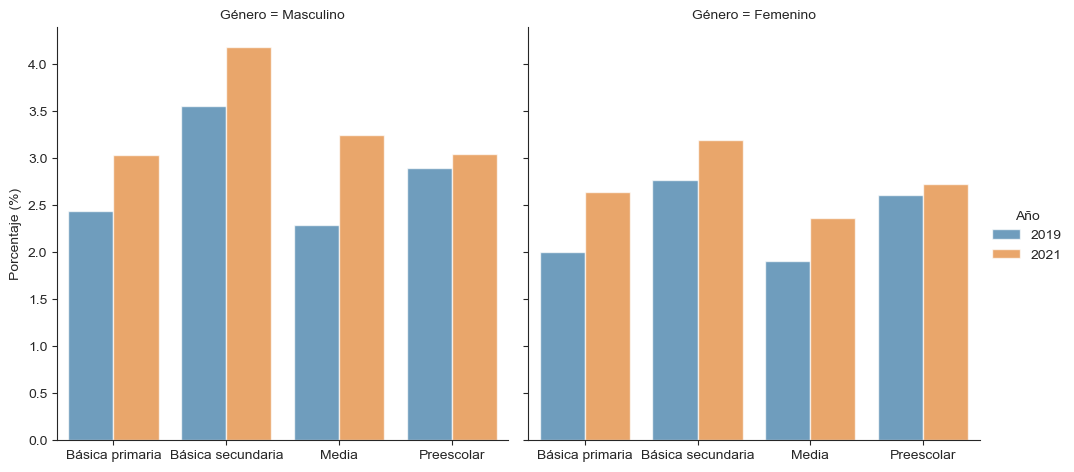

In [11]:
# Finally we create the desertion graph:

sns.set_style('ticks')

g = sns.catplot(data=d_rate,
                kind='bar',
                x='Educación',
                y='value',
                hue='Año',
                col='Género',
                alpha=0.7)

g.axes[0,0].set_xlabel(None)
g.axes[0,1].set_xlabel(None)
g.axes[0,0].set_ylabel('Porcentaje (%)')


# plt.savefig('desercion.pdf', bbox_inches='tight')